In [1]:
import rasterio
import rasterio.plot
from rasterio.plot import plotting_extent
import pyproj
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns; 
sns.set(font_scale=1.5)
sns.set_style("whitegrid")
#https://geohackweek.github.io/raster/04-workingwithrasters/
#https://www.earthdatascience.org/courses/earth-analytics-python/lidar-raster-data/classify-plot-raster-data-in-python/

ModuleNotFoundError: No module named 'rasterio'

In [10]:
import gdal

In [16]:
gdal.UseExceptions()

In [17]:
daa= gdal.Open('D:/data/lights/F182013.v4c.pct_lights.tif')

RuntimeError: This is a BigTIFF file.  BigTIFF is not supported by this version of GDAL and libtiff.

In [7]:
channel = np.array(ds.GetRasterBand(1).ReadAsArray())

AttributeError: 'NoneType' object has no attribute 'GetRasterBand'

In [2]:
filepath = 'D:/data/lights/F182013.v4c.avg_lights_x_pct.tif'
with rasterio.open(filepath) as src:
    print(src.profile)
    lidar_dtm_im = src.read(1, masked=True)
    spatial_extent = plotting_extent(src)

RasterioIOError: This is a BigTIFF file.  BigTIFF is not supported by this version of GDAL and libtiff.

In [6]:
lidar_dtm_im

masked_array(
  data=[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],
  mask=False,
  fill_value=999999,
  dtype=uint16)

In [7]:
# View min and max values in the data
print('CHM min value:' ,lidar_dtm_im.min())
print('CHM max value:' ,lidar_dtm_im.max())

CHM min value: 0
CHM max value: 65535


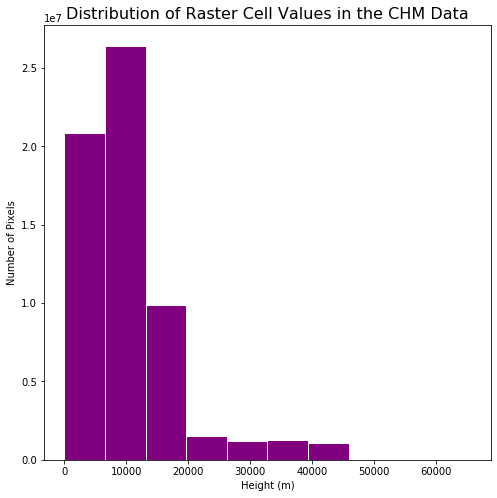

In [8]:
fig, ax = plt.subplots(figsize=(8,8))

ax.hist(lidar_dtm_im.ravel(), 
        color='purple', 
        edgecolor='white')
ax.set_title("Distribution of Raster Cell Values in the CHM Data",
             fontsize = 16)
ax.set(xlabel="Height (m)", 
       ylabel="Number of Pixels");

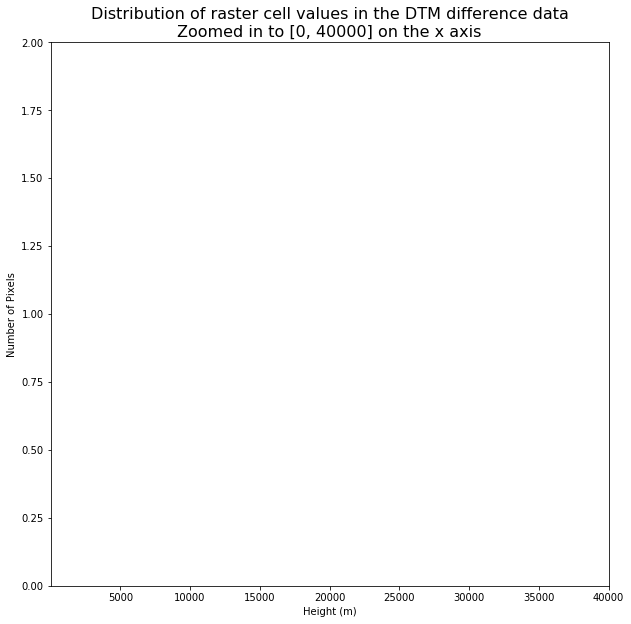

In [12]:
# Histogram
fig, ax = plt.subplots(figsize = (10,10))
xlim = [0, 40000]
ax.hist(lidar_dtm_im.ravel(), 
        color='purple', edgecolor='white', range=xlim,
        bins=range(*xlim))
ax.set(ylabel="Number of Pixels", xlabel="Height (m)",
       xlim=[2, 40000], ylim=[0, 2]);
ax.set_title("Distribution of raster cell values in the DTM difference data\nZoomed in to {} on the x axis".format(xlim),
             fontsize=16);

您也可以查看Python用于绘制直方图的值。为此，您可以收集呼叫时返回的输出hist。这包括三件事：

-counts，表示每个bin中的项目数

-bins，代表垃圾箱的边缘（垃圾箱中将有一个额外的项目与计数相比）

-patches，它们是matplotlib表示与每个箱对应的可视化条的对象。如果您想在绘图后更改条形的视觉外观，这些非常有用。

注意：如果您不想担心函数返回的特定变量，只需将其替换_为如下注释中所示的：

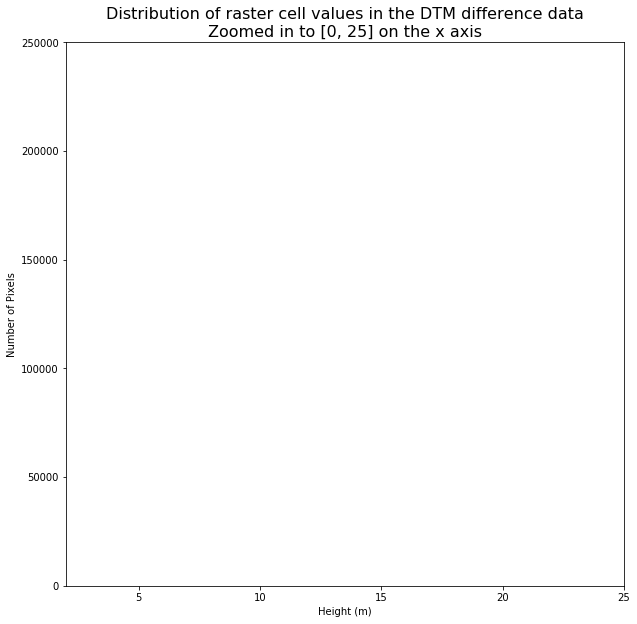

In [14]:
# Histogram
fig, ax = plt.subplots(figsize = (10,10))
xlim = [0, 25]
ax.hist(lidar_dtm_im.ravel(), 
        color='purple', edgecolor='white', range=xlim,
        bins=range(*xlim))
ax.set(ylabel="Number of Pixels", xlabel="Height (m)",
       xlim=[2, 25], ylim=[0, 250000]);
ax.set_title("Distribution of raster cell values in the DTM difference data\nZoomed in to {} on the x axis".format(xlim),
             fontsize=16);

下面你定义了4个箱子。但是，最终会得到一个fifth class == 0表示小于0chm中最小值的值。这些值<0来自numpy掩码填充值，您可以在此文本上方看到。

In [16]:
# Define bins that you want, and then classify the data
class_bins = [lidar_dtm_im.min(), 2, 7, 12, np.inf]

# You'll classify the original image array, then unravel it again for plotting
lidar_dtm_im_class = np.digitize(lidar_dtm_im, class_bins)

# Note that you have an extra class in the data (0)
print(np.unique(lidar_dtm_im_class))

[1 4]


In [18]:
# Reassign all values that are classified as 0 to masked (no data value)
# This will prevent pixels that == 0 from being rendered on a map in matplotlib
lidar_dtm_class_ma = np.ma.masked_where(lidar_dtm_im_class == 0 , 
                              lidar_dtm_im_class, 
                              copy=True)

In [19]:
lidar_dtm_class_ma

masked_array(
  data=[[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],
  mask=False,
  fill_value=999999,
  dtype=int64)

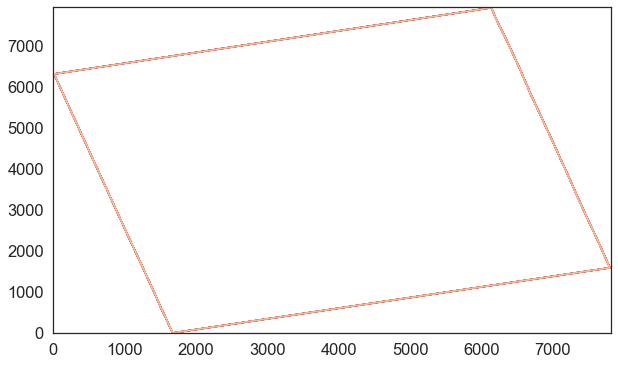

In [24]:
# A cleaner seaborn style for raster plots
sns.set_style("white")
# Plot newly classified and masked raster
fig, ax = plt.subplots(figsize = (10,6))
#ax.imshow(lidar_dtm_class_ma)
ax.contour(lidar_dtm_class_ma)
plt.show()